# K-Means

O objetivo deste exemplo é treinar um modelo não-supervisionado para agrupar em K perfis os clientes de uma loja / shopping.  Analisar / visualizar perfis de clientes.


## Referências
* Kaggle, https://www.kaggle.com/shwetabh123/mall-customers
* Super Data Science, https://www.superdatascience.com/machine-learning/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Carregando os dados

In [3]:
dataset = pd.read_csv("https://github.com/ect-info/ml/raw/master/dados/Mall_Customers.csv")

dataset.head(  )

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
X = dataset.iloc[:,[3,4]].values

print(X[0:6,:])


[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]
 [17 76]]


## Treinamento

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, init = 'random', random_state = 1)
y_kmeans = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualização do treinamento

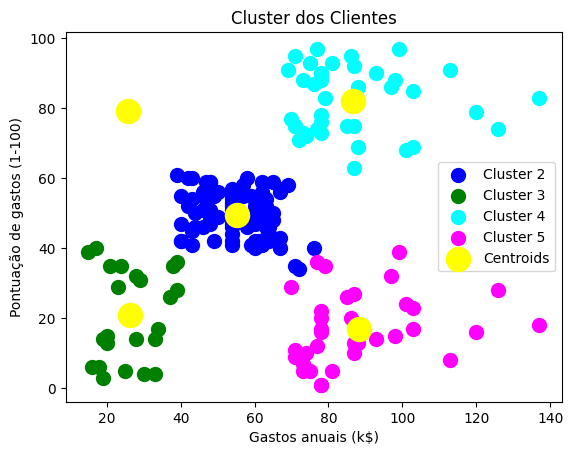

In [13]:
# Visualising the clusters
#plt.scatter(X[:, 0], X[:, 1], s = 100, c = 'red', label = 'Data')

#plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster dos Clientes')
plt.xlabel('Gastos anuais (k$)')
plt.ylabel('Pontuação de gastos (1-100)')
plt.legend()
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

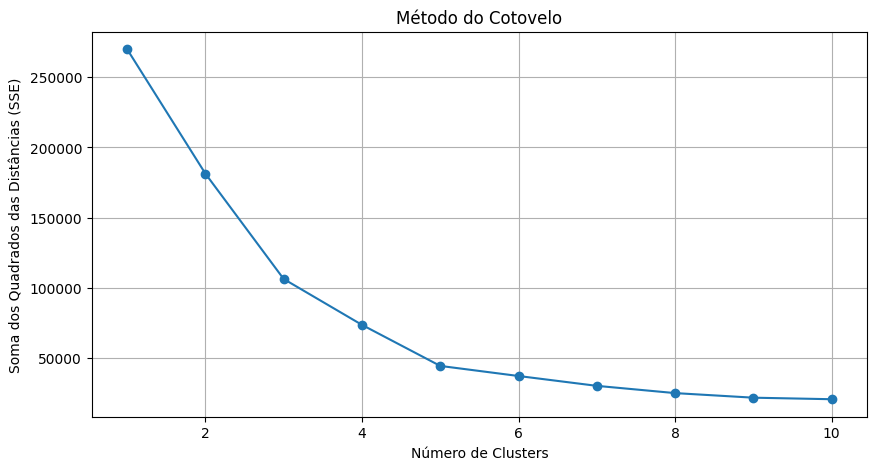

In [8]:
sse = []

# Testar diferentes números de clusters
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados das Distâncias (SSE)')
plt.grid()

# Exibir o gráfico
plt.show()